In [1]:
%pylab inline
import scipy.integrate as integrate
from IPython import display
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# solve_ivp functions

# returns vector of dx/dt, dAcx/dt and dAx/dt in that order

def derivs(t, y, nu, xs, w0, d):
    x0 = y[0]               # position of hub
    N = int(0.5*(len(y)-1))   # of lattice sites
    Acx = y[1:N+1]          # bound complex on lattice
    Ax = y[-N:]             # free complex on lattice
    
    
    eps = 1e-8
    jj = where(Acx < eps)[0] # check where Acx is very small (and will log(Acx) be a problem)
    Acx_temp = Acx.copy()    # make a temporary copy to change, so that Acx does not need to be changed
    Acx_temp[jj] = 1e-10      
    err = (log(eps)-log(Acx_temp))
    

    wr = zeros(N)
    ii = where(err < 0.0)[0]
    wr[ii] = w0*Acx[ii]
    force_unbinding = wr * exp(abs(x0 - xs) * d)
    
    
    
    dxcdt = integrate.trapz(-(x0-xs)*Acx, x=xs)  # force equation
    binding = exp(-0.5*(x0-xs)**2)*Ax 
    burnt = nu*Acx
    

    dAcxdt = (binding - burnt - force_unbinding)   # complex chemistry
    dAxdt = -binding + force_unbinding           # free substrate chemistry
    
    return array( [dxcdt] + list(dAcxdt) + list(dAxdt))     # maybe a better way to put them all together

In [6]:
# define event as having gone to x = 20.0
def event(t, y):
    x0 = y[0]
        
    return (20.0-x0)*(1000.0-t)

event.direction = 0        
event.terminal = True     # stop solver if event satisfied

In [7]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

# parameters - just 2 params in this model
tf = 400.0

a0s = [1.0,5.0,10.0]
a0_n = len(a0s)

nus = [0.1,1.0,10.0]
nu_n = len(nus)

deltas = concatenate((zeros(1),linspace(0.1, 0.7, 7)))
delta_n = len(deltas)

ws = concatenate((zeros(1),logspace(-1, 1, 9, base=10)))
w_n = len(ws)


# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)

print(a0s,nus,deltas,ws)

[1.0, 5.0, 10.0] [0.1, 1.0, 10.0] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7] [ 0.          0.1         0.17782794  0.31622777  0.56234133  1.
  1.77827941  3.16227766  5.62341325 10.        ]


In [8]:
#I.C.

sol0 = []  # record final speed
for a0 in a0s:
    sol1 = []
    for nu in nus:
        sol2 = []
        for delta in deltas:
            A0x = zeros(Nx)
            A0x[xs > 0.0] = a0

            # iterate over params
            sol3  = []
            for w in ws:
                print(a0,nu,delta, w)

                x0 = 0.0
                Ax = 1.0*A0x
                Acx = zeros(Nx)

                # initial conditions for all the equations, y0
                y0 = array([x0] + list(Acx) + list(Ax))



                sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,w, delta), (0., tf), y0, events=[event], method='BDF')

                v_final = derivs(sol.t[-1], sol.y[:,-1], nu, xs, w, delta)[0]  #dx/dt

                Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
                btot = integrate.trapz(nu*Acxf, x=xs)    # total rate of burnt at final time

                xp_vals = sol.y[0]
                x_vals = xs
                t_vals = sol.t
                Ac_vals = sol.y[1:Nx+1]
                As_vals = sol.y[Nx+1:]


                vs = []
                for i in range(len(t_vals)):
                    v = derivs(0.,sol.y[:,i], nu, xs, w, delta)[0]
                    vs.append(v)
                check = 0

                efficiency = v_final**2 / (btot)


                sol3.append(efficiency)
            sol2.append(sol3)
        sol1.append(sol2)
    sol0.append(sol1)

1.0 0.1 0.0 0.0
1.0 0.1 0.0 0.1
1.0 0.1 0.0 0.1778279410038923
1.0 0.1 0.0 0.31622776601683794
1.0 0.1 0.0 0.5623413251903491
1.0 0.1 0.0 1.0
1.0 0.1 0.0 1.7782794100389228
1.0 0.1 0.0 3.1622776601683795
1.0 0.1 0.0 5.623413251903491
1.0 0.1 0.0 10.0
1.0 0.1 0.1 0.0
1.0 0.1 0.1 0.1
1.0 0.1 0.1 0.1778279410038923
1.0 0.1 0.1 0.31622776601683794
1.0 0.1 0.1 0.5623413251903491
1.0 0.1 0.1 1.0
1.0 0.1 0.1 1.7782794100389228
1.0 0.1 0.1 3.1622776601683795
1.0 0.1 0.1 5.623413251903491
1.0 0.1 0.1 10.0
1.0 0.1 0.2 0.0
1.0 0.1 0.2 0.1
1.0 0.1 0.2 0.1778279410038923
1.0 0.1 0.2 0.31622776601683794
1.0 0.1 0.2 0.5623413251903491
1.0 0.1 0.2 1.0
1.0 0.1 0.2 1.7782794100389228
1.0 0.1 0.2 3.1622776601683795
1.0 0.1 0.2 5.623413251903491
1.0 0.1 0.2 10.0
1.0 0.1 0.3 0.0
1.0 0.1 0.3 0.1
1.0 0.1 0.3 0.1778279410038923
1.0 0.1 0.3 0.31622776601683794
1.0 0.1 0.3 0.5623413251903491
1.0 0.1 0.3 1.0
1.0 0.1 0.3 1.7782794100389228
1.0 0.1 0.3 3.1622776601683795
1.0 0.1 0.3 5.623413251903491
1.0 0.1 0.3 1

5.0 1.0 0.0 0.5623413251903491
5.0 1.0 0.0 1.0
5.0 1.0 0.0 1.7782794100389228
5.0 1.0 0.0 3.1622776601683795
5.0 1.0 0.0 5.623413251903491
5.0 1.0 0.0 10.0
5.0 1.0 0.1 0.0
5.0 1.0 0.1 0.1
5.0 1.0 0.1 0.1778279410038923
5.0 1.0 0.1 0.31622776601683794
5.0 1.0 0.1 0.5623413251903491
5.0 1.0 0.1 1.0
5.0 1.0 0.1 1.7782794100389228
5.0 1.0 0.1 3.1622776601683795
5.0 1.0 0.1 5.623413251903491
5.0 1.0 0.1 10.0
5.0 1.0 0.2 0.0
5.0 1.0 0.2 0.1
5.0 1.0 0.2 0.1778279410038923
5.0 1.0 0.2 0.31622776601683794
5.0 1.0 0.2 0.5623413251903491
5.0 1.0 0.2 1.0
5.0 1.0 0.2 1.7782794100389228
5.0 1.0 0.2 3.1622776601683795
5.0 1.0 0.2 5.623413251903491
5.0 1.0 0.2 10.0
5.0 1.0 0.3 0.0
5.0 1.0 0.3 0.1
5.0 1.0 0.3 0.1778279410038923
5.0 1.0 0.3 0.31622776601683794
5.0 1.0 0.3 0.5623413251903491
5.0 1.0 0.3 1.0
5.0 1.0 0.3 1.7782794100389228
5.0 1.0 0.3 3.1622776601683795
5.0 1.0 0.3 5.623413251903491
5.0 1.0 0.3 10.0
5.0 1.0 0.4 0.0
5.0 1.0 0.4 0.1
5.0 1.0 0.4 0.1778279410038923
5.0 1.0 0.4 0.31622776601683

10.0 10.0 0.0 0.1
10.0 10.0 0.0 0.1778279410038923
10.0 10.0 0.0 0.31622776601683794
10.0 10.0 0.0 0.5623413251903491
10.0 10.0 0.0 1.0
10.0 10.0 0.0 1.7782794100389228
10.0 10.0 0.0 3.1622776601683795
10.0 10.0 0.0 5.623413251903491
10.0 10.0 0.0 10.0
10.0 10.0 0.1 0.0
10.0 10.0 0.1 0.1
10.0 10.0 0.1 0.1778279410038923
10.0 10.0 0.1 0.31622776601683794
10.0 10.0 0.1 0.5623413251903491
10.0 10.0 0.1 1.0
10.0 10.0 0.1 1.7782794100389228
10.0 10.0 0.1 3.1622776601683795
10.0 10.0 0.1 5.623413251903491
10.0 10.0 0.1 10.0
10.0 10.0 0.2 0.0
10.0 10.0 0.2 0.1
10.0 10.0 0.2 0.1778279410038923
10.0 10.0 0.2 0.31622776601683794
10.0 10.0 0.2 0.5623413251903491
10.0 10.0 0.2 1.0
10.0 10.0 0.2 1.7782794100389228
10.0 10.0 0.2 3.1622776601683795
10.0 10.0 0.2 5.623413251903491
10.0 10.0 0.2 10.0
10.0 10.0 0.3 0.0
10.0 10.0 0.3 0.1
10.0 10.0 0.3 0.1778279410038923
10.0 10.0 0.3 0.31622776601683794
10.0 10.0 0.3 0.5623413251903491
10.0 10.0 0.3 1.0
10.0 10.0 0.3 1.7782794100389228
10.0 10.0 0.3 3.16

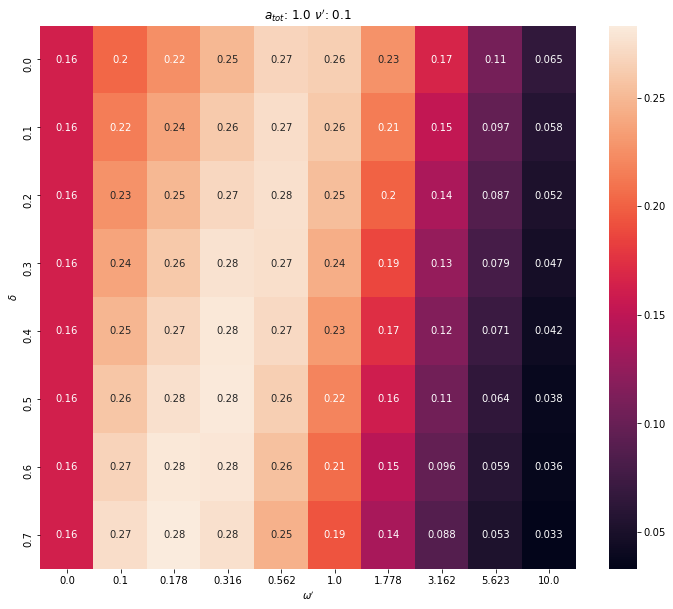

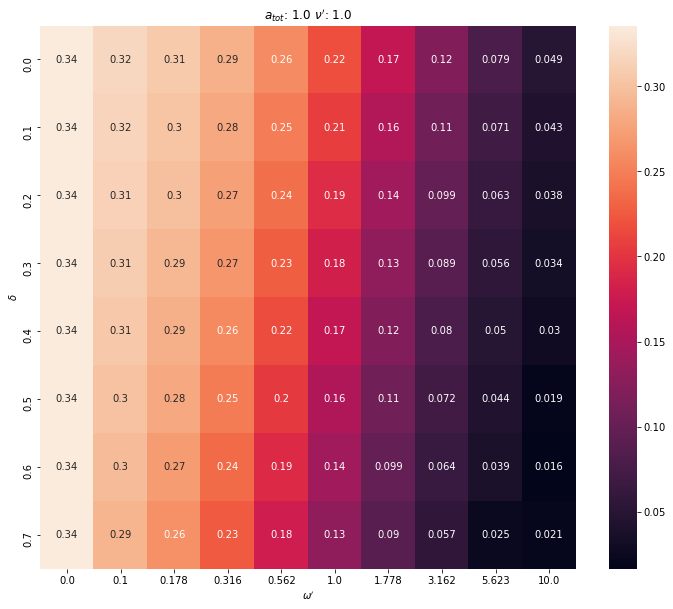

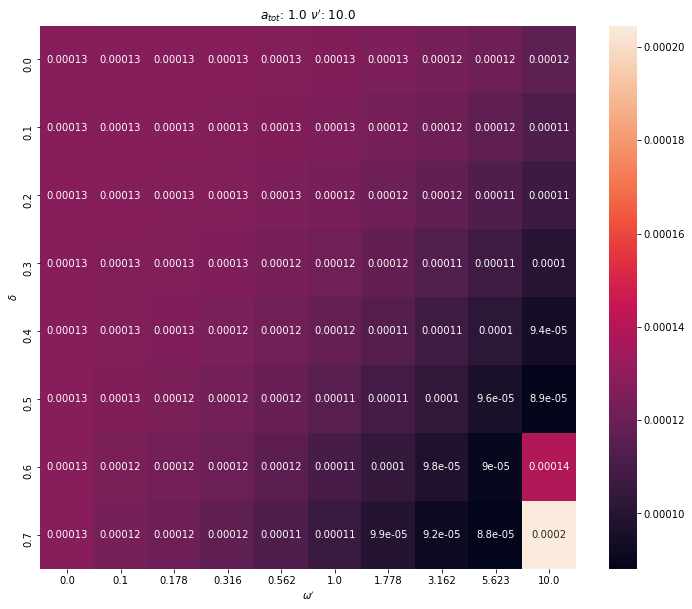

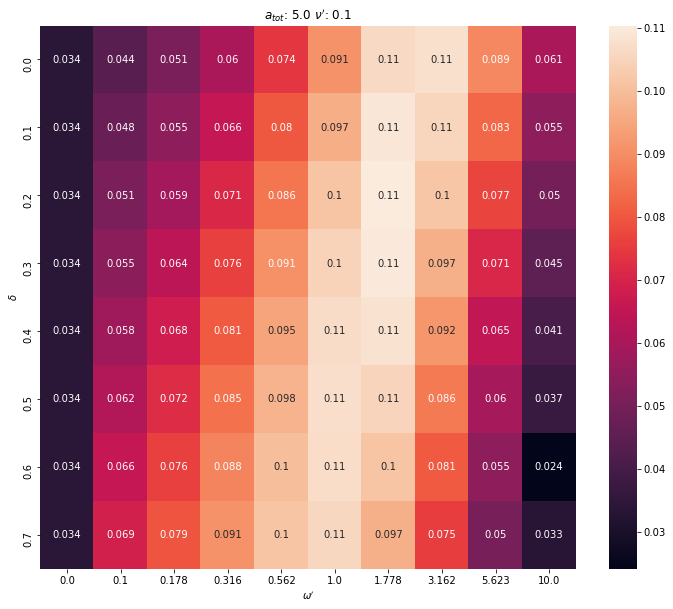

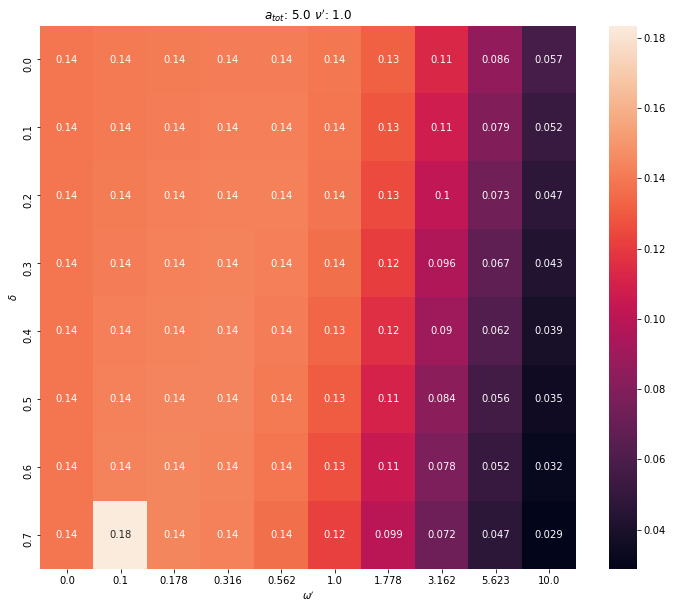

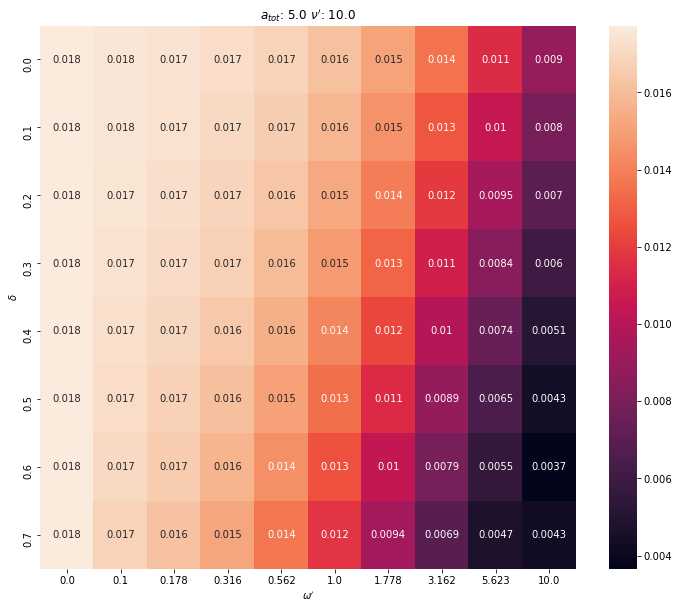

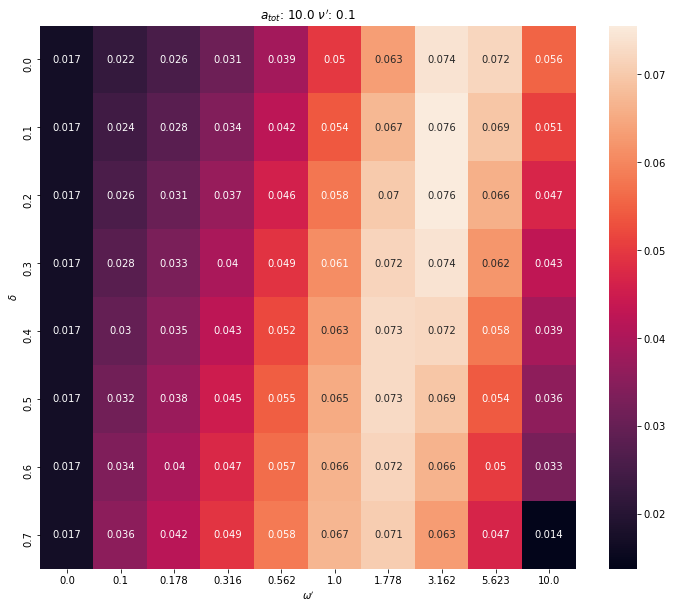

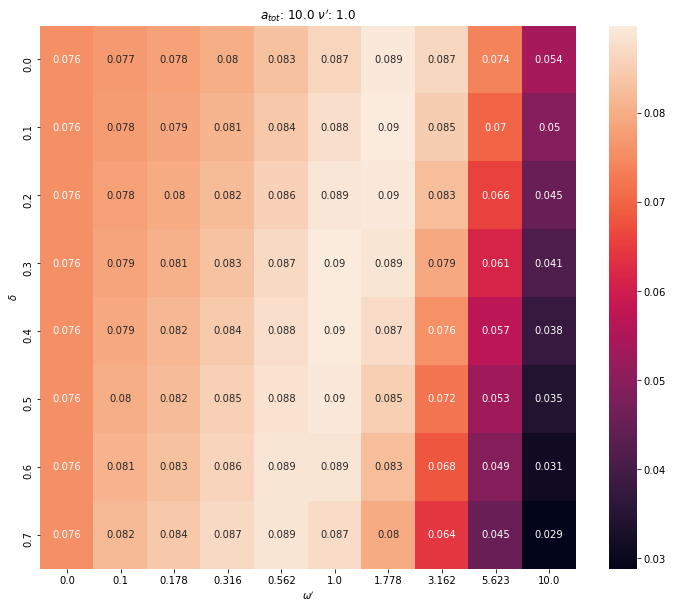

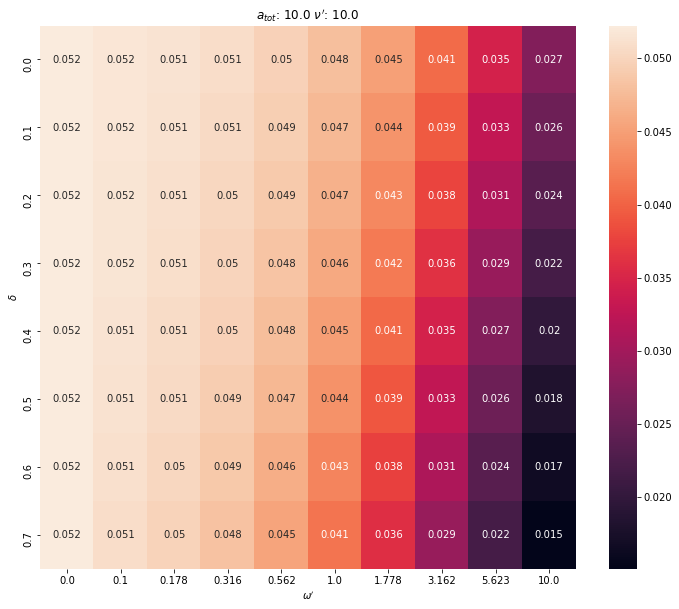

In [9]:
wtmp = []
for i in ws:
    wtmp.append(round(i,3))
for i in range(a0_n):
    for j in range(nu_n):
        figure(figsize=(12,10))
        sb.heatmap(sol0[i][j],xticklabels = wtmp, yticklabels = deltas,annot=True)
        xlabel(r"$\omega'$")
        ylabel(r"$\delta$")
        title("$a_{tot}$: "+str(round(a0s[i],2))+r" $\nu'$: " +str(round(nus[j],2)))
        show()

In [61]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

# parameters - just 2 params in this model
tf = 400.0

a0s = array([1.0,2.0,5.0,10.0])
a0_n = len(a0s)

nus = logspace(-1,1,7,base = 10)
nus = ones(1)
nu_n = len(nus)

ws = concatenate((zeros(1),logspace(-1, 1, 9, base=10)))
w_n = len(ws)


# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)

print(a0s,nus,ws)

[ 1.  2.  5. 10.] [1.] [ 0.          0.1         0.17782794  0.31622777  0.56234133  1.
  1.77827941  3.16227766  5.62341325 10.        ]


In [62]:
#I.C.

delta = 0.0
nu = 0.1

sol0 = []  # record final speed
for a0 in a0s:
    sol1 = []
    for nu in nus:
        A0x = zeros(Nx)
        A0x[xs > 0.0] = a0
        sol2 = []
        for w in ws:
            print(a0,nu,delta, w)

            x0 = 0.0
            Ax = 1.0*A0x
            Acx = zeros(Nx)

            # initial conditions for all the equations, y0
            y0 = array([x0] + list(Acx) + list(Ax))



            sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,w, delta), (0., tf), y0, events=[event], method='BDF')

            v_final = derivs(sol.t[-1], sol.y[:,-1], nu, xs, w, delta)[0]  #dx/dt

            Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
            btot = integrate.trapz(nu*Acxf, x=xs)    # total rate of burnt at final time

            xp_vals = sol.y[0]
            x_vals = xs
            t_vals = sol.t
            Ac_vals = sol.y[1:Nx+1]
            As_vals = sol.y[Nx+1:]


            vs = []
            for i in range(len(t_vals)):
                v = derivs(0.,sol.y[:,i], nu, xs, w, delta)[0]
                vs.append(v)
            check = 0

            efficiency = v_final**2 / (btot)
            sol2.append(efficiency)
        sol1.append(sol2)
    sol0.append(sol1)

1.0 1.0 0.0 0.0
1.0 1.0 0.0 0.1
1.0 1.0 0.0 0.1778279410038923
1.0 1.0 0.0 0.31622776601683794
1.0 1.0 0.0 0.5623413251903491
1.0 1.0 0.0 1.0
1.0 1.0 0.0 1.7782794100389228
1.0 1.0 0.0 3.1622776601683795
1.0 1.0 0.0 5.623413251903491
1.0 1.0 0.0 10.0
2.0 1.0 0.0 0.0
2.0 1.0 0.0 0.1
2.0 1.0 0.0 0.1778279410038923
2.0 1.0 0.0 0.31622776601683794
2.0 1.0 0.0 0.5623413251903491
2.0 1.0 0.0 1.0
2.0 1.0 0.0 1.7782794100389228
2.0 1.0 0.0 3.1622776601683795
2.0 1.0 0.0 5.623413251903491
2.0 1.0 0.0 10.0
5.0 1.0 0.0 0.0
5.0 1.0 0.0 0.1
5.0 1.0 0.0 0.1778279410038923
5.0 1.0 0.0 0.31622776601683794
5.0 1.0 0.0 0.5623413251903491
5.0 1.0 0.0 1.0
5.0 1.0 0.0 1.7782794100389228
5.0 1.0 0.0 3.1622776601683795
5.0 1.0 0.0 5.623413251903491
5.0 1.0 0.0 10.0
10.0 1.0 0.0 0.0
10.0 1.0 0.0 0.1
10.0 1.0 0.0 0.1778279410038923
10.0 1.0 0.0 0.31622776601683794
10.0 1.0 0.0 0.5623413251903491
10.0 1.0 0.0 1.0
10.0 1.0 0.0 1.7782794100389228
10.0 1.0 0.0 3.1622776601683795
10.0 1.0 0.0 5.623413251903491
10.0

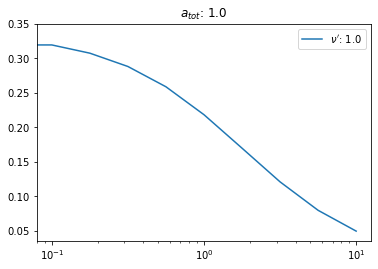

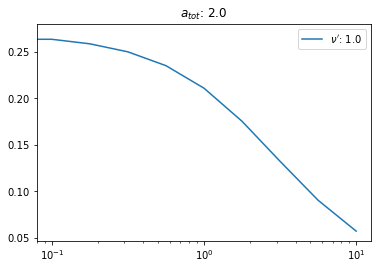

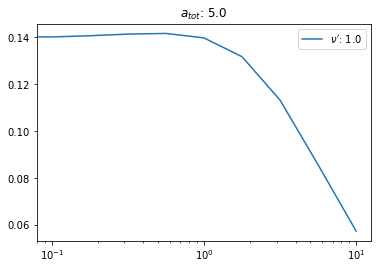

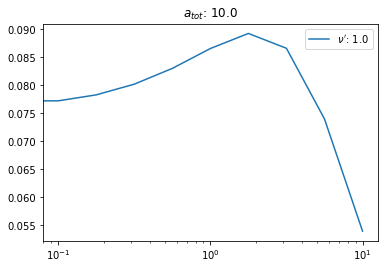

In [72]:
for i in range(a0_n):
    title("$a_{tot}$: " +str(round(a0s[i],3)))
    for j in range(nu_n):
        plot(ws,sol0[i][j], label =r"$\nu'$: "+str(round(nus[j],3)))
        xscale("log")
        #yscale("log")
        legend()
        show()

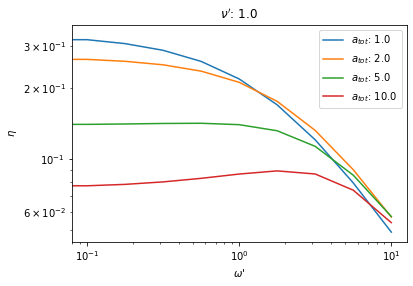

In [69]:
for i in range(nu_n):
    title(r"$\nu'$: "+str(round(nus[i],3)))
    for j in range(a0_n):
        plot(ws,sol0[j][i], label ="$a_{tot}$: " +str(round(a0s[j],3)))
        xscale("log")
        yscale("log")
        xlabel(r"$\omega$'")
        ylabel(r"$\eta$")
    legend()
    show()

In [22]:
# use solve_ivp to find solution from t0=0 up to a max tf= 400, but stop if x hits x=20.0

# parameters - just 2 params in this model
tf = 400.0

a0s = logspace(0,1,10,base = 10)
a0_n = len(a0s)

ratios = linspace(1,10,10)
ratio_n = len(ratios)

ws = concatenate((zeros(1),logspace(-1, 1, 9, base=10)))
w_n = len(ws)


# define domain and lattice
Lmax = 30.0
Lmin = -5.0
dx = 0.1
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)

print(a0s,ratios,ws)

[ 1.          1.29154967  1.66810054  2.15443469  2.7825594   3.59381366
  4.64158883  5.9948425   7.74263683 10.        ] [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 0.          0.1         0.17782794  0.31622777  0.56234133  1.
  1.77827941  3.16227766  5.62341325 10.        ]


In [21]:
#I.C.

delta = 0.3

sol0 = []  # record final speed
for a0 in a0s:
    sol1 = []
    for ratio in ratios:
        sol2 = []
        A0x = zeros(Nx)
        A0x[xs > 0.0] = a0
        nu = a0/ratio
        for w in ws:
            print(a0,nu,delta, w)

            x0 = 0.0
            Ax = 1.0*A0x
            Acx = zeros(Nx)

            # initial conditions for all the equations, y0
            y0 = array([x0] + list(Acx) + list(Ax))



            sol = integrate.solve_ivp(lambda t, y: derivs(t, y, nu, xs,w, delta), (0., tf), y0, events=[event], method='BDF')

            v_final = derivs(sol.t[-1], sol.y[:,-1], nu, xs, w, delta)[0]  #dx/dt

            Acxf = sol.y[1:1+Nx,-1]  # final amount of complex
            btot = integrate.trapz(nu*Acxf, x=xs)    # total rate of burnt at final time

            xp_vals = sol.y[0]
            x_vals = xs
            t_vals = sol.t
            Ac_vals = sol.y[1:Nx+1]
            As_vals = sol.y[Nx+1:]


            vs = []
            for i in range(len(t_vals)):
                v = derivs(0.,sol.y[:,i], nu, xs, w, delta)[0]
                vs.append(v)
            check = 0

            efficiency = v_final**2 / (btot)


            sol2.append(efficiency)
        sol1.append(sol2)
    sol0.append(sol1)

1.0 1.0 0.3 0.0
1.0 1.0 0.3 0.1
1.0 1.0 0.3 0.1778279410038923
1.0 1.0 0.3 0.31622776601683794
1.0 1.0 0.3 0.5623413251903491
1.0 1.0 0.3 1.0
1.0 1.0 0.3 1.7782794100389228
1.0 1.0 0.3 3.1622776601683795
1.0 1.0 0.3 5.623413251903491
1.0 1.0 0.3 10.0
1.0 0.5 0.3 0.0
1.0 0.5 0.3 0.1
1.0 0.5 0.3 0.1778279410038923
1.0 0.5 0.3 0.31622776601683794
1.0 0.5 0.3 0.5623413251903491
1.0 0.5 0.3 1.0
1.0 0.5 0.3 1.7782794100389228
1.0 0.5 0.3 3.1622776601683795
1.0 0.5 0.3 5.623413251903491
1.0 0.5 0.3 10.0
1.0 0.3333333333333333 0.3 0.0
1.0 0.3333333333333333 0.3 0.1
1.0 0.3333333333333333 0.3 0.1778279410038923
1.0 0.3333333333333333 0.3 0.31622776601683794
1.0 0.3333333333333333 0.3 0.5623413251903491
1.0 0.3333333333333333 0.3 1.0
1.0 0.3333333333333333 0.3 1.7782794100389228
1.0 0.3333333333333333 0.3 3.1622776601683795
1.0 0.3333333333333333 0.3 5.623413251903491
1.0 0.3333333333333333 0.3 10.0
1.0 0.25 0.3 0.0
1.0 0.25 0.3 0.1
1.0 0.25 0.3 0.1778279410038923
1.0 0.25 0.3 0.3162277660168379

1.2915496650148839 0.1291549665014884 0.3 0.1
1.2915496650148839 0.1291549665014884 0.3 0.1778279410038923
1.2915496650148839 0.1291549665014884 0.3 0.31622776601683794
1.2915496650148839 0.1291549665014884 0.3 0.5623413251903491
1.2915496650148839 0.1291549665014884 0.3 1.0
1.2915496650148839 0.1291549665014884 0.3 1.7782794100389228
1.2915496650148839 0.1291549665014884 0.3 3.1622776601683795
1.2915496650148839 0.1291549665014884 0.3 5.623413251903491
1.2915496650148839 0.1291549665014884 0.3 10.0
1.6681005372000588 1.6681005372000588 0.3 0.0
1.6681005372000588 1.6681005372000588 0.3 0.1
1.6681005372000588 1.6681005372000588 0.3 0.1778279410038923
1.6681005372000588 1.6681005372000588 0.3 0.31622776601683794
1.6681005372000588 1.6681005372000588 0.3 0.5623413251903491
1.6681005372000588 1.6681005372000588 0.3 1.0
1.6681005372000588 1.6681005372000588 0.3 1.7782794100389228
1.6681005372000588 1.6681005372000588 0.3 3.1622776601683795
1.6681005372000588 1.6681005372000588 0.3 5.6234132

2.154434690031884 0.4308869380063768 0.3 0.0
2.154434690031884 0.4308869380063768 0.3 0.1
2.154434690031884 0.4308869380063768 0.3 0.1778279410038923
2.154434690031884 0.4308869380063768 0.3 0.31622776601683794
2.154434690031884 0.4308869380063768 0.3 0.5623413251903491
2.154434690031884 0.4308869380063768 0.3 1.0
2.154434690031884 0.4308869380063768 0.3 1.7782794100389228
2.154434690031884 0.4308869380063768 0.3 3.1622776601683795
2.154434690031884 0.4308869380063768 0.3 5.623413251903491
2.154434690031884 0.4308869380063768 0.3 10.0
2.154434690031884 0.3590724483386473 0.3 0.0
2.154434690031884 0.3590724483386473 0.3 0.1
2.154434690031884 0.3590724483386473 0.3 0.1778279410038923
2.154434690031884 0.3590724483386473 0.3 0.31622776601683794
2.154434690031884 0.3590724483386473 0.3 0.5623413251903491
2.154434690031884 0.3590724483386473 0.3 1.0
2.154434690031884 0.3590724483386473 0.3 1.7782794100389228
2.154434690031884 0.3590724483386473 0.3 3.1622776601683795
2.154434690031884 0.359

2.7825594022071245 0.2782559402207124 0.3 0.0
2.7825594022071245 0.2782559402207124 0.3 0.1
2.7825594022071245 0.2782559402207124 0.3 0.1778279410038923
2.7825594022071245 0.2782559402207124 0.3 0.31622776601683794
2.7825594022071245 0.2782559402207124 0.3 0.5623413251903491
2.7825594022071245 0.2782559402207124 0.3 1.0
2.7825594022071245 0.2782559402207124 0.3 1.7782794100389228
2.7825594022071245 0.2782559402207124 0.3 3.1622776601683795
2.7825594022071245 0.2782559402207124 0.3 5.623413251903491
2.7825594022071245 0.2782559402207124 0.3 10.0
3.5938136638046276 3.5938136638046276 0.3 0.0
3.5938136638046276 3.5938136638046276 0.3 0.1
3.5938136638046276 3.5938136638046276 0.3 0.1778279410038923
3.5938136638046276 3.5938136638046276 0.3 0.31622776601683794
3.5938136638046276 3.5938136638046276 0.3 0.5623413251903491
3.5938136638046276 3.5938136638046276 0.3 1.0
3.5938136638046276 3.5938136638046276 0.3 1.7782794100389228
3.5938136638046276 3.5938136638046276 0.3 3.1622776601683795
3.593

4.641588833612778 0.9283177667225557 0.3 0.0
4.641588833612778 0.9283177667225557 0.3 0.1
4.641588833612778 0.9283177667225557 0.3 0.1778279410038923
4.641588833612778 0.9283177667225557 0.3 0.31622776601683794
4.641588833612778 0.9283177667225557 0.3 0.5623413251903491
4.641588833612778 0.9283177667225557 0.3 1.0
4.641588833612778 0.9283177667225557 0.3 1.7782794100389228
4.641588833612778 0.9283177667225557 0.3 3.1622776601683795
4.641588833612778 0.9283177667225557 0.3 5.623413251903491
4.641588833612778 0.9283177667225557 0.3 10.0
4.641588833612778 0.773598138935463 0.3 0.0
4.641588833612778 0.773598138935463 0.3 0.1
4.641588833612778 0.773598138935463 0.3 0.1778279410038923
4.641588833612778 0.773598138935463 0.3 0.31622776601683794
4.641588833612778 0.773598138935463 0.3 0.5623413251903491
4.641588833612778 0.773598138935463 0.3 1.0
4.641588833612778 0.773598138935463 0.3 1.7782794100389228
4.641588833612778 0.773598138935463 0.3 3.1622776601683795
4.641588833612778 0.77359813893

5.994842503189409 0.5994842503189408 0.3 0.1778279410038923
5.994842503189409 0.5994842503189408 0.3 0.31622776601683794
5.994842503189409 0.5994842503189408 0.3 0.5623413251903491
5.994842503189409 0.5994842503189408 0.3 1.0
5.994842503189409 0.5994842503189408 0.3 1.7782794100389228
5.994842503189409 0.5994842503189408 0.3 3.1622776601683795
5.994842503189409 0.5994842503189408 0.3 5.623413251903491
5.994842503189409 0.5994842503189408 0.3 10.0
7.742636826811269 7.742636826811269 0.3 0.0
7.742636826811269 7.742636826811269 0.3 0.1
7.742636826811269 7.742636826811269 0.3 0.1778279410038923
7.742636826811269 7.742636826811269 0.3 0.31622776601683794
7.742636826811269 7.742636826811269 0.3 0.5623413251903491
7.742636826811269 7.742636826811269 0.3 1.0
7.742636826811269 7.742636826811269 0.3 1.7782794100389228
7.742636826811269 7.742636826811269 0.3 3.1622776601683795
7.742636826811269 7.742636826811269 0.3 5.623413251903491
7.742636826811269 7.742636826811269 0.3 10.0
7.742636826811269 

10.0 1.25 0.3 0.31622776601683794
10.0 1.25 0.3 0.5623413251903491
10.0 1.25 0.3 1.0
10.0 1.25 0.3 1.7782794100389228
10.0 1.25 0.3 3.1622776601683795
10.0 1.25 0.3 5.623413251903491
10.0 1.25 0.3 10.0
10.0 1.1111111111111112 0.3 0.0
10.0 1.1111111111111112 0.3 0.1
10.0 1.1111111111111112 0.3 0.1778279410038923
10.0 1.1111111111111112 0.3 0.31622776601683794
10.0 1.1111111111111112 0.3 0.5623413251903491
10.0 1.1111111111111112 0.3 1.0
10.0 1.1111111111111112 0.3 1.7782794100389228
10.0 1.1111111111111112 0.3 3.1622776601683795
10.0 1.1111111111111112 0.3 5.623413251903491
10.0 1.1111111111111112 0.3 10.0
10.0 1.0 0.3 0.0
10.0 1.0 0.3 0.1
10.0 1.0 0.3 0.1778279410038923
10.0 1.0 0.3 0.31622776601683794
10.0 1.0 0.3 0.5623413251903491
10.0 1.0 0.3 1.0
10.0 1.0 0.3 1.7782794100389228
10.0 1.0 0.3 3.1622776601683795
10.0 1.0 0.3 5.623413251903491
10.0 1.0 0.3 10.0


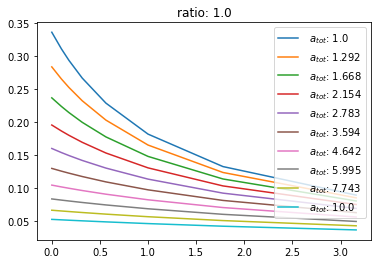

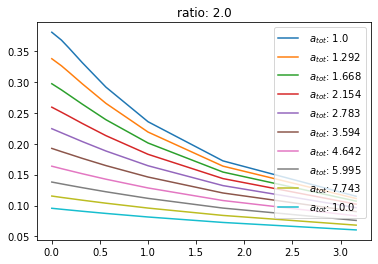

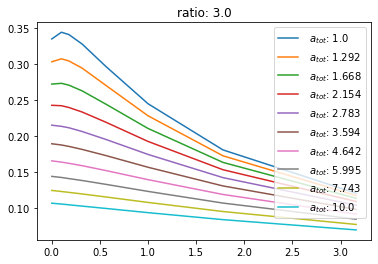

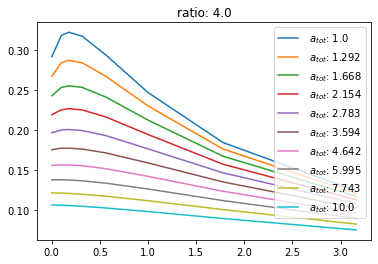

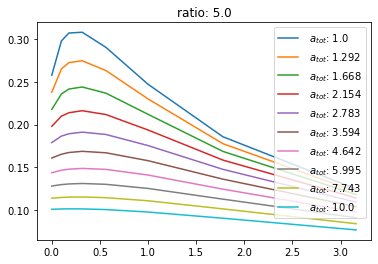

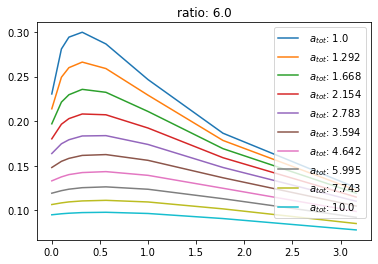

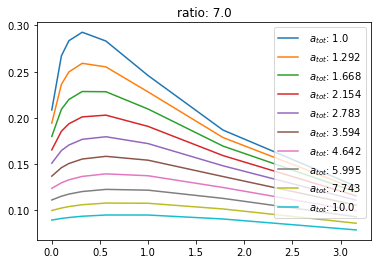

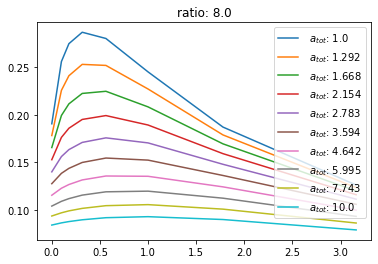

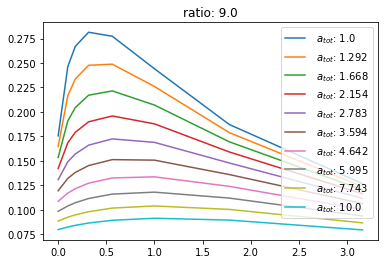

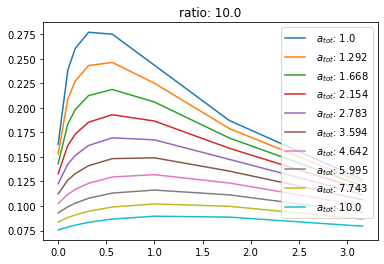

In [38]:
for i in range(ratio_n):
    for j in range(a0_n):
        title("ratio: "+str(round(ratios[i],3)))
        plot(ws[:-2],sol0[j][i][:-2], label =r" $a_{tot}$: " +str(round(a0s[j],3)))
        #xscale("log")
    legend()
    show()